In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from identification import *

plt.style.use('default')

In [2]:

df_data_090 = pd.read_csv('../data/entrada_saida_nsenos_n10_090v.csv'  , header=None)
df_data_097 = pd.read_csv('../data/entrada_saida_nsenos_n10_097v.csv' , header=None)
df_data_104 = pd.read_csv('../data/entrada_saida_nsenos_n10_104v.csv', header=None)
df_data_111 = pd.read_csv('../data/entrada_saida_nsenos_n10_111v.csv', header=None)

In [3]:
data_090 = np.array(df_data_090, ndmin=2)
u_ar_090 = np.array(df_data_090[0],ndmin=2).T
y_ar_090 = np.array(df_data_090[1],ndmin=2).T

data_097 = np.array(df_data_097, ndmin=2)
u_ar_097 = np.array(df_data_097[0],ndmin=2).T
y_ar_097 = np.array(df_data_097[1],ndmin=2).T

data_104 = np.array(df_data_104, ndmin=2)
u_ar_104 = np.array(df_data_104[0],ndmin=2).T
y_ar_104 = np.array(df_data_104[1],ndmin=2).T

data_111 = np.array(df_data_111, ndmin=2)
u_ar_111 = np.array(df_data_111[0],ndmin=2).T
y_ar_111 = np.array(df_data_111[1],ndmin=2).T

### removendo o tempo morto manualmente

In [4]:
def number_of_zeros(x):
    for i in range(x.size):
        if x[i] != 0:
            return i
    return 0

In [5]:
nz = number_of_zeros(y_ar_090)
y_ar_090 = y_ar_090[nz-1:]
u_ar_090 = u_ar_090[nz-1:]
nz = number_of_zeros(y_ar_097)
y_ar_097 = y_ar_097[nz-1:]
u_ar_097 = u_ar_097[nz-1:]
nz = number_of_zeros(y_ar_104)
y_ar_104 = y_ar_104[nz-1:]
u_ar_104 = u_ar_104[nz-1:]
nz = number_of_zeros(y_ar_111)
y_ar_111 = y_ar_111[nz-1:]
u_ar_111 = u_ar_111[nz-1:]


In [6]:
nmax = min(y_ar_090.size,y_ar_097.size,y_ar_104.size,y_ar_111.size)

y_ar_090 = y_ar_090[:nmax]
y_ar_097 = y_ar_097[:nmax]
y_ar_104 = y_ar_104[:nmax]
y_ar_111 = y_ar_111[:nmax]

u_ar_090 = u_ar_090[:nmax]
u_ar_097 = u_ar_097[:nmax]
u_ar_104 = u_ar_104[:nmax]
u_ar_111 = u_ar_111[:nmax]


In [7]:
print(y_ar_090[:2], y_ar_097[:2], y_ar_104[:2], y_ar_111[:2])

print(y_ar_090.size == y_ar_097.size == y_ar_104.size == y_ar_111.size)

[[  0.        ]
 [106.22460367]] [[ 0.        ]
 [97.77754913]] [[  0.        ]
 [130.65471631]] [[  0.        ]
 [130.65471631]]
True


Modelo ARX:

1ª ordem:: y(k) = -ay(k-1) + bu(k-1)

 2ª ordem:: y(k) = - a1*y(k-1) - a2*y(k-2) + b1*u(k-1) + b2*u(k-2)

3ª ordem:: y(k) = - a1*y(k-1) - a2*y(k-2) - a3*y(k-3) + b1*u(k-1) + b2*u(k-2) + b3*u(k-3)

4ª ordem:: y(k) = - a1*y(k-1) - a2*y(k-2) - a3*y(k-3) - a4*y(k-4) + b1*u(k-1) + b2*u(k-2) + b3*u(k-3) + b4*u(k-4)

Modelo discretizado das equações diferenciais (vazio): y(k) = - a1*y(k-1) - a2*y(k-2) + b1*u(k-2)

In [8]:
Y_1o_090, phi_1o_090 =     build_Y_phi_ARX(u_ar_090,y_ar_090,1)
Y_2o_090, phi_2o_090 =     build_Y_phi_ARX(u_ar_090,y_ar_090,2)
Y_3o_090, phi_3o_090 =     build_Y_phi_ARX(u_ar_090,y_ar_090,3)
Y_4o_090, phi_4o_090 =     build_Y_phi_ARX(u_ar_090,y_ar_090,4)
Y_5o_090, phi_5o_090 =     build_Y_phi_ARX(u_ar_090,y_ar_090,5)
Y_6o_090, phi_6o_090 =     build_Y_phi_ARX(u_ar_090,y_ar_090,6)
Y_7o_090, phi_7o_090 =     build_Y_phi_ARX(u_ar_090,y_ar_090,7)
Y_8o_090, phi_8o_090 =     build_Y_phi_ARX(u_ar_090,y_ar_090,8)
Y_9o_090, phi_9o_090 =     build_Y_phi_ARX(u_ar_090,y_ar_090,9)
Y_0o_090, phi_0o_090 =     build_Y_phi_ARX(u_ar_090,y_ar_090,10)
Y_ed_090, phi_ed_090 = build_Y_phi_ed_load(u_ar_090, y_ar_090)

theta_hat_1o_090 = calcular_theta_min_quad(Y_1o_090,phi_1o_090)
theta_hat_2o_090 = calcular_theta_min_quad(Y_2o_090,phi_2o_090)
theta_hat_3o_090 = calcular_theta_min_quad(Y_3o_090,phi_3o_090)
theta_hat_4o_090 = calcular_theta_min_quad(Y_4o_090,phi_4o_090)
theta_hat_5o_090 = calcular_theta_min_quad(Y_5o_090,phi_5o_090)
theta_hat_6o_090 = calcular_theta_min_quad(Y_6o_090,phi_6o_090)
theta_hat_7o_090 = calcular_theta_min_quad(Y_7o_090,phi_7o_090)
theta_hat_8o_090 = calcular_theta_min_quad(Y_8o_090,phi_8o_090)
theta_hat_9o_090 = calcular_theta_min_quad(Y_9o_090,phi_9o_090)
theta_hat_0o_090 = calcular_theta_min_quad(Y_0o_090,phi_0o_090)
theta_hat_ed_090 = calcular_theta_min_quad(Y_ed_090,phi_ed_090)

y_hat_1o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_1o_090,ord=1)
y_hat_2o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_2o_090,ord=2)
y_hat_3o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_3o_090,ord=3)
y_hat_4o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_4o_090,ord=4)
y_hat_5o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_5o_090,ord=4)
y_hat_6o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_6o_090,ord=4)
y_hat_7o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_7o_090,ord=4)
y_hat_8o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_8o_090,ord=4)
y_hat_9o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_9o_090,ord=4)
y_hat_0o_090 = estimate_output(y=y_ar_090,u=u_ar_090,theta=theta_hat_0o_090,ord=4)
y_hat_ed_090 = estimate_output_ed(y_ar_090,u_ar_090,theta_hat_ed_090)

V_1o_090 = cost_func(y_ar_090, y_hat_1o_090)
V_2o_090 = cost_func(y_ar_090, y_hat_2o_090)
V_3o_090 = cost_func(y_ar_090, y_hat_3o_090)
V_4o_090 = cost_func(y_ar_090, y_hat_4o_090)
V_5o_090 = cost_func(y_ar_090, y_hat_5o_090)
V_6o_090 = cost_func(y_ar_090, y_hat_6o_090)
V_7o_090 = cost_func(y_ar_090, y_hat_7o_090)
V_8o_090 = cost_func(y_ar_090, y_hat_8o_090)
V_9o_090 = cost_func(y_ar_090, y_hat_9o_090)
V_0o_090 = cost_func(y_ar_090, y_hat_0o_090)
V_ed_090 = cost_func(y_ar_090, y_hat_ed_090)

In [9]:
Y_1o_097, phi_1o_097 =     build_Y_phi_ARX(u_ar_097,y_ar_097,1)
Y_2o_097, phi_2o_097 =     build_Y_phi_ARX(u_ar_097,y_ar_097,2)
Y_3o_097, phi_3o_097 =     build_Y_phi_ARX(u_ar_097,y_ar_097,3)
Y_4o_097, phi_4o_097 =     build_Y_phi_ARX(u_ar_097,y_ar_097,4)
Y_5o_097, phi_5o_097 =     build_Y_phi_ARX(u_ar_097,y_ar_097,5)
Y_6o_097, phi_6o_097 =     build_Y_phi_ARX(u_ar_097,y_ar_097,6)
Y_7o_097, phi_7o_097 =     build_Y_phi_ARX(u_ar_097,y_ar_097,7)
Y_8o_097, phi_8o_097 =     build_Y_phi_ARX(u_ar_097,y_ar_097,8)
Y_9o_097, phi_9o_097 =     build_Y_phi_ARX(u_ar_097,y_ar_097,9)
Y_0o_097, phi_0o_097 =     build_Y_phi_ARX(u_ar_097,y_ar_097,10)
Y_ed_097, phi_ed_097 = build_Y_phi_ed_load(u_ar_097,y_ar_097)

theta_hat_1o_097 = calcular_theta_min_quad(Y_1o_097,phi_1o_097)
theta_hat_2o_097 = calcular_theta_min_quad(Y_2o_097,phi_2o_097)
theta_hat_3o_097 = calcular_theta_min_quad(Y_3o_097,phi_3o_097)
theta_hat_4o_097 = calcular_theta_min_quad(Y_4o_097,phi_4o_097)
theta_hat_5o_097 = calcular_theta_min_quad(Y_5o_097,phi_5o_097)
theta_hat_6o_097 = calcular_theta_min_quad(Y_6o_097,phi_6o_097)
theta_hat_7o_097 = calcular_theta_min_quad(Y_7o_097,phi_7o_097)
theta_hat_8o_097 = calcular_theta_min_quad(Y_8o_097,phi_8o_097)
theta_hat_9o_097 = calcular_theta_min_quad(Y_9o_097,phi_9o_097)
theta_hat_0o_097 = calcular_theta_min_quad(Y_0o_097,phi_0o_097)
theta_hat_ed_097 = calcular_theta_min_quad(Y_ed_097,phi_ed_097)

y_hat_1o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_1o_097,ord=1)
y_hat_2o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_2o_097,ord=2)
y_hat_3o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_3o_097,ord=3)
y_hat_4o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_4o_097,ord=4)
y_hat_5o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_5o_097,ord=4)
y_hat_6o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_6o_097,ord=4)
y_hat_7o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_7o_097,ord=4)
y_hat_8o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_8o_097,ord=4)
y_hat_9o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_9o_097,ord=4)
y_hat_0o_097 = estimate_output(y=y_ar_097,u=u_ar_097,theta=theta_hat_0o_097,ord=4)
y_hat_ed_097 = estimate_output_ed(y_ar_097,u_ar_097,theta_hat_ed_097)

V_1o_097 = cost_func(y_ar_097,y_hat_1o_097)
V_2o_097 = cost_func(y_ar_097,y_hat_2o_097)
V_3o_097 = cost_func(y_ar_097,y_hat_3o_097)
V_4o_097 = cost_func(y_ar_097,y_hat_4o_097)
V_5o_097 = cost_func(y_ar_097,y_hat_5o_097)
V_6o_097 = cost_func(y_ar_097,y_hat_6o_097)
V_7o_097 = cost_func(y_ar_097,y_hat_7o_097)
V_8o_097 = cost_func(y_ar_097,y_hat_8o_097)
V_9o_097 = cost_func(y_ar_097,y_hat_9o_097)
V_0o_097 = cost_func(y_ar_097,y_hat_0o_097)
V_ed_097 = cost_func(y_ar_097,y_hat_ed_097)

In [10]:
Y_1o_104, phi_1o_104 =     build_Y_phi_ARX(u_ar_104,y_ar_104,1)
Y_2o_104, phi_2o_104 =     build_Y_phi_ARX(u_ar_104,y_ar_104,2)
Y_3o_104, phi_3o_104 =     build_Y_phi_ARX(u_ar_104,y_ar_104,3)
Y_4o_104, phi_4o_104 =     build_Y_phi_ARX(u_ar_104,y_ar_104,4)
Y_5o_104, phi_5o_104 =     build_Y_phi_ARX(u_ar_104,y_ar_104,5)
Y_6o_104, phi_6o_104 =     build_Y_phi_ARX(u_ar_104,y_ar_104,6)
Y_7o_104, phi_7o_104 =     build_Y_phi_ARX(u_ar_104,y_ar_104,7)
Y_8o_104, phi_8o_104 =     build_Y_phi_ARX(u_ar_104,y_ar_104,8)
Y_9o_104, phi_9o_104 =     build_Y_phi_ARX(u_ar_104,y_ar_104,9)
Y_0o_104, phi_0o_104 =     build_Y_phi_ARX(u_ar_104,y_ar_104,10)
Y_ed_104, phi_ed_104 = build_Y_phi_ed_load(u_ar_104,y_ar_104)

theta_hat_1o_104 = calcular_theta_min_quad(Y_1o_104,phi_1o_104)
theta_hat_2o_104 = calcular_theta_min_quad(Y_2o_104,phi_2o_104)
theta_hat_3o_104 = calcular_theta_min_quad(Y_3o_104,phi_3o_104)
theta_hat_4o_104 = calcular_theta_min_quad(Y_4o_104,phi_4o_104)
theta_hat_5o_104 = calcular_theta_min_quad(Y_5o_104,phi_5o_104)
theta_hat_6o_104 = calcular_theta_min_quad(Y_6o_104,phi_6o_104)
theta_hat_7o_104 = calcular_theta_min_quad(Y_7o_104,phi_7o_104)
theta_hat_8o_104 = calcular_theta_min_quad(Y_8o_104,phi_8o_104)
theta_hat_9o_104 = calcular_theta_min_quad(Y_9o_104,phi_9o_104)
theta_hat_0o_104 = calcular_theta_min_quad(Y_0o_104,phi_0o_104)
theta_hat_ed_104 = calcular_theta_min_quad(Y_ed_104,phi_ed_104)

y_hat_1o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_1o_104,ord=1)
y_hat_2o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_2o_104,ord=2)
y_hat_3o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_3o_104,ord=3)
y_hat_4o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_4o_104,ord=4)
y_hat_5o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_5o_104,ord=4)
y_hat_6o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_6o_104,ord=4)
y_hat_7o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_7o_104,ord=4)
y_hat_8o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_8o_104,ord=4)
y_hat_9o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_9o_104,ord=4)
y_hat_0o_104 = estimate_output(y=y_ar_104,u=u_ar_104,theta=theta_hat_0o_104,ord=4)
y_hat_ed_104 = estimate_output_ed(y_ar_104,u_ar_104,theta_hat_ed_104)

V_1o_104 = cost_func(y_ar_104,y_hat_1o_104)
V_2o_104 = cost_func(y_ar_104,y_hat_2o_104)
V_3o_104 = cost_func(y_ar_104,y_hat_3o_104)
V_4o_104 = cost_func(y_ar_104,y_hat_4o_104)
V_5o_104 = cost_func(y_ar_104,y_hat_5o_104)
V_6o_104 = cost_func(y_ar_104,y_hat_6o_104)
V_7o_104 = cost_func(y_ar_104,y_hat_7o_104)
V_8o_104 = cost_func(y_ar_104,y_hat_8o_104)
V_9o_104 = cost_func(y_ar_104,y_hat_9o_104)
V_0o_104 = cost_func(y_ar_104,y_hat_0o_104)
V_ed_104 = cost_func(y_ar_104,y_hat_ed_104)

In [11]:
Y_1o_111, phi_1o_111 =     build_Y_phi_ARX(u_ar_111,y_ar_111,1)
Y_2o_111, phi_2o_111 =     build_Y_phi_ARX(u_ar_111,y_ar_111,2)
Y_3o_111, phi_3o_111 =     build_Y_phi_ARX(u_ar_111,y_ar_111,3)
Y_4o_111, phi_4o_111 =     build_Y_phi_ARX(u_ar_111,y_ar_111,4)
Y_5o_111, phi_5o_111 =     build_Y_phi_ARX(u_ar_111,y_ar_111,5)
Y_6o_111, phi_6o_111 =     build_Y_phi_ARX(u_ar_111,y_ar_111,6)
Y_7o_111, phi_7o_111 =     build_Y_phi_ARX(u_ar_111,y_ar_111,7)
Y_8o_111, phi_8o_111 =     build_Y_phi_ARX(u_ar_111,y_ar_111,8)
Y_9o_111, phi_9o_111 =     build_Y_phi_ARX(u_ar_111,y_ar_111,9)
Y_0o_111, phi_0o_111 =     build_Y_phi_ARX(u_ar_111,y_ar_111,10)
Y_ed_111, phi_ed_111 = build_Y_phi_ed_load(u_ar_111,y_ar_111)

theta_hat_1o_111 = calcular_theta_min_quad(Y_1o_111,phi_1o_111)
theta_hat_2o_111 = calcular_theta_min_quad(Y_2o_111,phi_2o_111)
theta_hat_3o_111 = calcular_theta_min_quad(Y_3o_111,phi_3o_111)
theta_hat_4o_111 = calcular_theta_min_quad(Y_4o_111,phi_4o_111)
theta_hat_5o_111 = calcular_theta_min_quad(Y_5o_111,phi_5o_111)
theta_hat_6o_111 = calcular_theta_min_quad(Y_6o_111,phi_6o_111)
theta_hat_7o_111 = calcular_theta_min_quad(Y_7o_111,phi_7o_111)
theta_hat_8o_111 = calcular_theta_min_quad(Y_8o_111,phi_8o_111)
theta_hat_9o_111 = calcular_theta_min_quad(Y_9o_111,phi_9o_111)
theta_hat_0o_111 = calcular_theta_min_quad(Y_0o_111,phi_0o_111)
theta_hat_ed_111 = calcular_theta_min_quad(Y_ed_111,phi_ed_111)

y_hat_1o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_1o_111,ord=1)
y_hat_2o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_2o_111,ord=2)
y_hat_3o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_3o_111,ord=3)
y_hat_4o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_4o_111,ord=4)
y_hat_5o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_5o_111,ord=4)
y_hat_6o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_6o_111,ord=4)
y_hat_7o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_7o_111,ord=4)
y_hat_8o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_8o_111,ord=4)
y_hat_9o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_9o_111,ord=4)
y_hat_0o_111 = estimate_output(y=y_ar_111,u=u_ar_111,theta=theta_hat_0o_111,ord=4)
y_hat_ed_111 = estimate_output_ed(y_ar_111,u_ar_111,theta_hat_ed_111)

V_1o_111 = cost_func(y_ar_111,y_hat_1o_111)
V_2o_111 = cost_func(y_ar_111,y_hat_2o_111)
V_3o_111 = cost_func(y_ar_111,y_hat_3o_111)
V_4o_111 = cost_func(y_ar_111,y_hat_4o_111)
V_5o_111 = cost_func(y_ar_111,y_hat_5o_111)
V_6o_111 = cost_func(y_ar_111,y_hat_6o_111)
V_7o_111 = cost_func(y_ar_111,y_hat_7o_111)
V_8o_111 = cost_func(y_ar_111,y_hat_8o_111)
V_9o_111 = cost_func(y_ar_111,y_hat_9o_111)
V_0o_111 = cost_func(y_ar_111,y_hat_0o_111)
V_ed_111 = cost_func(y_ar_111,y_hat_ed_111)

In [12]:
print('9V:')
print(f'ARX 1ª ordem V = {np.round(V_1o_090,1)},    ARX 6ª ordem V = {np.round(V_6o_090,1)}')
print(f'ARX 2ª ordem V = {np.round(V_2o_090,1)},    ARX 7ª ordem V = {np.round(V_7o_090,1)}')
print(f'ARX 3ª ordem V = {np.round(V_3o_090,1)},    ARX 8ª ordem V = {np.round(V_8o_090,1)}')
print(f'ARX 4ª ordem V = {np.round(V_4o_090,1)},    ARX 9ª ordem V = {np.round(V_9o_090,1)}')
print(f'ARX 5ª ordem V = {np.round(V_5o_090,1)},    ARX 10ªordem V = {np.round(V_0o_090,1)}')
print(f'discretizado V = {np.round(V_ed_090,1)}')

print('9.7V:')
print(f'ARX 1ª ordem V = {np.round(V_1o_097,1)},    ARX 6ª ordem V = {np.round(V_6o_097,1)}')
print(f'ARX 2ª ordem V = {np.round(V_2o_097,1)},    ARX 7ª ordem V = {np.round(V_7o_097,1)}')
print(f'ARX 3ª ordem V = {np.round(V_3o_097,1)},    ARX 8ª ordem V = {np.round(V_8o_097,1)}')
print(f'ARX 4ª ordem V = {np.round(V_4o_097,1)},    ARX 9ª ordem V = {np.round(V_9o_097,1)}')
print(f'ARX 5ª ordem V = {np.round(V_5o_097,1)},    ARX 10ªordem V = {np.round(V_0o_097,1)}')
print(f'discretizado V = {np.round(V_ed_097,1)}')

print('10.4V:')
print(f'ARX 1ª ordem V = {np.round(V_1o_104,1)},    ARX 6ª ordem V = {np.round(V_6o_104,1)}')
print(f'ARX 2ª ordem V = {np.round(V_2o_104,1)},    ARX 7ª ordem V = {np.round(V_7o_104,1)}')
print(f'ARX 3ª ordem V = {np.round(V_3o_104,1)},    ARX 8ª ordem V = {np.round(V_8o_104,1)}')
print(f'ARX 4ª ordem V = {np.round(V_4o_104,1)},    ARX 9ª ordem V = {np.round(V_9o_104,1)}')
print(f'ARX 5ª ordem V = {np.round(V_5o_104,1)},    ARX 10ªordem V = {np.round(V_0o_104,1)}')
print(f'discretizado V = {np.round(V_ed_104,1)}')

print('11.1V:')
print(f'ARX 1ª ordem V = {np.round(V_1o_111,1)},    ARX 6ª ordem V = {np.round(V_6o_111,1)}')
print(f'ARX 2ª ordem V = {np.round(V_2o_111,1)},    ARX 7ª ordem V = {np.round(V_7o_111,1)}')
print(f'ARX 3ª ordem V = {np.round(V_3o_111,1)},    ARX 8ª ordem V = {np.round(V_8o_111,1)}')
print(f'ARX 4ª ordem V = {np.round(V_4o_111,1)},    ARX 9ª ordem V = {np.round(V_9o_111,1)}')
print(f'ARX 5ª ordem V = {np.round(V_5o_111,1)},    ARX 10ªordem V = {np.round(V_0o_111,1)}')
print(f'discretizado V = {np.round(V_ed_111,1)}')

9V:
ARX 1ª ordem V = 2546.9,    ARX 6ª ordem V = 28441257.2
ARX 2ª ordem V = 1830.6,    ARX 7ª ordem V = 122038701878.0
ARX 3ª ordem V = 2336.1,    ARX 8ª ordem V = 4.846700302898633e+27
ARX 4ª ordem V = 3185.3,    ARX 9ª ordem V = 1.208377892645748e+32
ARX 5ª ordem V = 482886.9,    ARX 10ªordem V = 3.1326541810242865e+31
discretizado V = 671.9
9.7V:
ARX 1ª ordem V = 3218.6,    ARX 6ª ordem V = 23519448.1
ARX 2ª ordem V = 2273.5,    ARX 7ª ordem V = 174283351.4
ARX 3ª ordem V = 3092.7,    ARX 8ª ordem V = 277881439.0
ARX 4ª ordem V = 3890.5,    ARX 9ª ordem V = 1750772568552679.2
ARX 5ª ordem V = 896720.0,    ARX 10ªordem V = 335533376306977.6
discretizado V = 736.5
10.4V:
ARX 1ª ordem V = 3954.1,    ARX 6ª ordem V = 31027574.5
ARX 2ª ordem V = 2946.6,    ARX 7ª ordem V = 7.685269572113519e+17
ARX 3ª ordem V = 4229.2,    ARX 8ª ordem V = 4.4754081165592735e+35
ARX 4ª ordem V = 6055.7,    ARX 9ª ordem V = 9.752279806903898e+38
ARX 5ª ordem V = 3590797.1,    ARX 10ªordem V = 6.4648706280

In [13]:
V_1o_090_log = np.round(np.log10(V_1o_090),2)
V_2o_090_log = np.round(np.log10(V_2o_090),2)
V_3o_090_log = np.round(np.log10(V_3o_090),2)
V_4o_090_log = np.round(np.log10(V_4o_090),2)
V_5o_090_log = np.round(np.log10(V_5o_090),2)
V_6o_090_log = np.round(np.log10(V_6o_090),2)
V_7o_090_log = np.round(np.log10(V_7o_090),2)
V_8o_090_log = np.round(np.log10(V_8o_090),2)
V_9o_090_log = np.round(np.log10(V_9o_090),2)
V_0o_090_log = np.round(np.log10(V_0o_090),2)
V_ed_090_log = np.round(np.log10(V_ed_090),2)

V_1o_097_log = np.round(np.log10(V_1o_097),2)
V_2o_097_log = np.round(np.log10(V_2o_097),2)
V_3o_097_log = np.round(np.log10(V_3o_097),2)
V_4o_097_log = np.round(np.log10(V_4o_097),2)
V_5o_097_log = np.round(np.log10(V_5o_097),2)
V_6o_097_log = np.round(np.log10(V_6o_097),2)
V_7o_097_log = np.round(np.log10(V_7o_097),2)
V_8o_097_log = np.round(np.log10(V_8o_097),2)
V_9o_097_log = np.round(np.log10(V_9o_097),2)
V_0o_097_log = np.round(np.log10(V_0o_097),2)
V_ed_097_log = np.round(np.log10(V_ed_097),2)

V_1o_104_log = np.round(np.log10(V_1o_104),2)
V_2o_104_log = np.round(np.log10(V_2o_104),2)
V_3o_104_log = np.round(np.log10(V_3o_104),2)
V_4o_104_log = np.round(np.log10(V_4o_104),2)
V_5o_104_log = np.round(np.log10(V_5o_104),2)
V_6o_104_log = np.round(np.log10(V_6o_104),2)
V_7o_104_log = np.round(np.log10(V_7o_104),2)
V_8o_104_log = np.round(np.log10(V_8o_104),2)
V_9o_104_log = np.round(np.log10(V_9o_104),2)
V_0o_104_log = np.round(np.log10(V_0o_104),2)
V_ed_104_log = np.round(np.log10(V_ed_104),2)

V_1o_111_log = np.round(np.log10(V_1o_111),2)
V_2o_111_log = np.round(np.log10(V_2o_111),2)
V_3o_111_log = np.round(np.log10(V_3o_111),2)
V_4o_111_log = np.round(np.log10(V_4o_111),2)
V_5o_111_log = np.round(np.log10(V_5o_111),2)
V_6o_111_log = np.round(np.log10(V_6o_111),2)
V_7o_111_log = np.round(np.log10(V_7o_111),2)
V_8o_111_log = np.round(np.log10(V_8o_111),2)
V_9o_111_log = np.round(np.log10(V_9o_111),2)
V_0o_111_log = np.round(np.log10(V_0o_111),2)
V_ed_111_log = np.round(np.log10(V_ed_111),2)

In [14]:
print('9V:')
print(f'ARX 1ª ordem V = {V_1o_090_log},    ARX 6ª ordem V = {V_6o_090_log}')
print(f'ARX 2ª ordem V = {V_2o_090_log},    ARX 7ª ordem V = {V_7o_090_log}')
print(f'ARX 3ª ordem V = {V_3o_090_log},    ARX 8ª ordem V = {V_8o_090_log}')
print(f'ARX 4ª ordem V = {V_4o_090_log},    ARX 9ª ordem V = {V_9o_090_log}')
print(f'ARX 5ª ordem V = {V_5o_090_log},    ARX 10ªordem V = {V_0o_090_log}')
print(f'discretizado V = {V_ed_090_log}')

print('9.7V:')
print(f'ARX 1ª ordem V = {V_1o_097_log},    ARX 6ª ordem V = {V_6o_097_log}')
print(f'ARX 2ª ordem V = {V_2o_097_log},    ARX 7ª ordem V = {V_7o_097_log}')
print(f'ARX 3ª ordem V = {V_3o_097_log},    ARX 8ª ordem V = {V_8o_097_log}')
print(f'ARX 4ª ordem V = {V_4o_097_log},    ARX 9ª ordem V = {V_9o_097_log}')
print(f'ARX 5ª ordem V = {V_5o_097_log},    ARX 10ªordem V = {V_0o_097_log}')
print(f'discretizado V = {V_ed_097_log}')

print('10.4V:')
print(f'ARX 1ª ordem V = {V_1o_104_log},    ARX 6ª ordem V = {V_6o_104_log}')
print(f'ARX 2ª ordem V = {V_2o_104_log},    ARX 7ª ordem V = {V_7o_104_log}')
print(f'ARX 3ª ordem V = {V_3o_104_log},    ARX 8ª ordem V = {V_8o_104_log}')
print(f'ARX 4ª ordem V = {V_4o_104_log},    ARX 9ª ordem V = {V_9o_104_log}')
print(f'ARX 5ª ordem V = {V_5o_104_log},    ARX 10ªordem V = {V_0o_104_log}')
print(f'discretizado V = {V_ed_104_log}')

print('11.1V:')
print(f'ARX 1ª ordem V = {V_1o_111_log},    ARX 6ª ordem V = {V_6o_111_log}')
print(f'ARX 2ª ordem V = {V_2o_111_log},    ARX 7ª ordem V = {V_7o_111_log}')
print(f'ARX 3ª ordem V = {V_3o_111_log},    ARX 8ª ordem V = {V_8o_111_log}')
print(f'ARX 4ª ordem V = {V_4o_111_log},    ARX 9ª ordem V = {V_9o_111_log}')
print(f'ARX 5ª ordem V = {V_5o_111_log},    ARX 10ªordem V = {V_0o_111_log}')
print(f'discretizado V = {V_ed_111_log}')

9V:
ARX 1ª ordem V = 3.41,    ARX 6ª ordem V = 7.45
ARX 2ª ordem V = 3.26,    ARX 7ª ordem V = 11.09
ARX 3ª ordem V = 3.37,    ARX 8ª ordem V = 27.69
ARX 4ª ordem V = 3.5,    ARX 9ª ordem V = 32.08
ARX 5ª ordem V = 5.68,    ARX 10ªordem V = 31.5
discretizado V = 2.83
9.7V:
ARX 1ª ordem V = 3.51,    ARX 6ª ordem V = 7.37
ARX 2ª ordem V = 3.36,    ARX 7ª ordem V = 8.24
ARX 3ª ordem V = 3.49,    ARX 8ª ordem V = 8.44
ARX 4ª ordem V = 3.59,    ARX 9ª ordem V = 15.24
ARX 5ª ordem V = 5.95,    ARX 10ªordem V = 14.53
discretizado V = 2.87
10.4V:
ARX 1ª ordem V = 3.6,    ARX 6ª ordem V = 7.49
ARX 2ª ordem V = 3.47,    ARX 7ª ordem V = 17.89
ARX 3ª ordem V = 3.63,    ARX 8ª ordem V = 35.65
ARX 4ª ordem V = 3.78,    ARX 9ª ordem V = 38.99
ARX 5ª ordem V = 6.56,    ARX 10ªordem V = 41.81
discretizado V = 2.88
11.1V:
ARX 1ª ordem V = 3.64,    ARX 6ª ordem V = 7.61
ARX 2ª ordem V = 3.5,    ARX 7ª ordem V = 22.24
ARX 3ª ordem V = 3.66,    ARX 8ª ordem V = 41.33
ARX 4ª ordem V = 3.78,    ARX 9ª ordem

In [15]:
best_ord_hall = find_best_ARX_order(u_ar_090,y_ar_090,5,0.10,True)
best_ord_hall = find_best_ARX_order(u_ar_097,y_ar_097,5,0.10,True)
best_ord_hall = find_best_ARX_order(u_ar_104,y_ar_104,5,0.10,True)
best_ord_hall = find_best_ARX_order(u_ar_111,y_ar_111,5,0.10,True)

ARX 1ª ordem V = 2546.8807556097
ARX 2ª ordem V = 1830.599478530769
ARX 3ª ordem V = 2336.1425461537865
2 é a melhor ordem
ARX 1ª ordem V = 3218.6078495027655
ARX 2ª ordem V = 2273.50867237957
ARX 3ª ordem V = 3092.6758240984605
2 é a melhor ordem
ARX 1ª ordem V = 3954.0953391734947
ARX 2ª ordem V = 2946.642542682863
ARX 3ª ordem V = 4229.161713896885
2 é a melhor ordem
ARX 1ª ordem V = 4359.49355849297
ARX 2ª ordem V = 3138.763555006745
ARX 3ª ordem V = 4614.5590146217855
2 é a melhor ordem


In [16]:
# 9v
df = pd.DataFrame(theta_hat_1o_090)
df.to_csv('../data/theta_hat_1o_emax_090.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_2o_090)
df.to_csv('../data/theta_hat_2o_emax_090.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_3o_090)
df.to_csv('../data/theta_hat_3o_emax_090.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_4o_090)
df.to_csv('../data/theta_hat_4o_emax_090.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_ed_090)
df.to_csv('../data/theta_hat_ed_emax_090.csv',header=False,index=False)


# 9.7v
df = pd.DataFrame(theta_hat_1o_097)
df.to_csv('../data/theta_hat_1o_emax_097.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_2o_097)
df.to_csv('../data/theta_hat_2o_emax_097.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_3o_097)
df.to_csv('../data/theta_hat_3o_emax_097.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_4o_097)
df.to_csv('../data/theta_hat_4o_emax_097.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_ed_097)
df.to_csv('../data/theta_hat_ed_emax_097.csv',header=False,index=False)

# 10.4v
df = pd.DataFrame(theta_hat_1o_104)
df.to_csv('../data/theta_hat_1o_emax_104.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_2o_104)
df.to_csv('../data/theta_hat_2o_emax_104.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_3o_104)
df.to_csv('../data/theta_hat_3o_emax_104.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_4o_104)
df.to_csv('../data/theta_hat_4o_emax_104.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_ed_104)
df.to_csv('../data/theta_hat_ed_emax_104.csv',header=False,index=False)

# 11.1v
df = pd.DataFrame(theta_hat_1o_111)
df.to_csv('../data/theta_hat_1o_emax_111.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_2o_111)
df.to_csv('../data/theta_hat_2o_emax_111.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_3o_111)
df.to_csv('../data/theta_hat_3o_emax_111.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_4o_111)
df.to_csv('../data/theta_hat_4o_emax_111.csv',header=False,index=False)

df = pd.DataFrame(theta_hat_ed_111)
df.to_csv('../data/theta_hat_ed_emax_111.csv',header=False,index=False)

In [17]:
print(f'09.0V: {theta_hat_2o_090.T}')
print(f'09.7V: {theta_hat_2o_097.T}')
print(f'10.4V: {theta_hat_2o_104.T}')
print(f'11.1V: {theta_hat_2o_111.T}')

09.0V: [[-7.73241366e-01 -3.25777981e-02  1.46200590e+02 -1.14069594e+02]]
09.7V: [[-7.73966279e-01 -3.11124734e-02  1.43579367e+02 -1.11515483e+02]]
10.4V: [[-8.26753806e-01  7.75369840e-03  1.37651329e+02 -1.07989626e+02]]
11.1V: [[-7.65790578e-01 -4.32023431e-02  1.41191173e+02 -1.10543058e+02]]


In [18]:
print(f'09.0V: {theta_hat_ed_090.T}')
print(f'09.7V: {theta_hat_ed_097.T}')
print(f'10.4V: {theta_hat_ed_104.T}')
print(f'11.1V: {theta_hat_ed_111.T}')

09.0V: [[-1.11465867e+00  6.27136421e-01  3.40002209e-04 -1.68804324e-04
   1.10789279e+02]]
09.7V: [[-1.07452919e+00  6.09838961e-01  3.52654155e-04 -1.77204567e-04
   1.16456733e+02]]
10.4V: [[-9.24525383e-01  4.89269770e-01  2.03062838e-04 -2.31484539e-05
   1.23657066e+02]]
11.1V: [[-7.15561968e-01  3.70256867e-01  1.69949091e-04  3.12006096e-05
   1.40570779e+02]]


/tmp/ipykernel_25317/4100156676.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axins = ax.inset_axes(


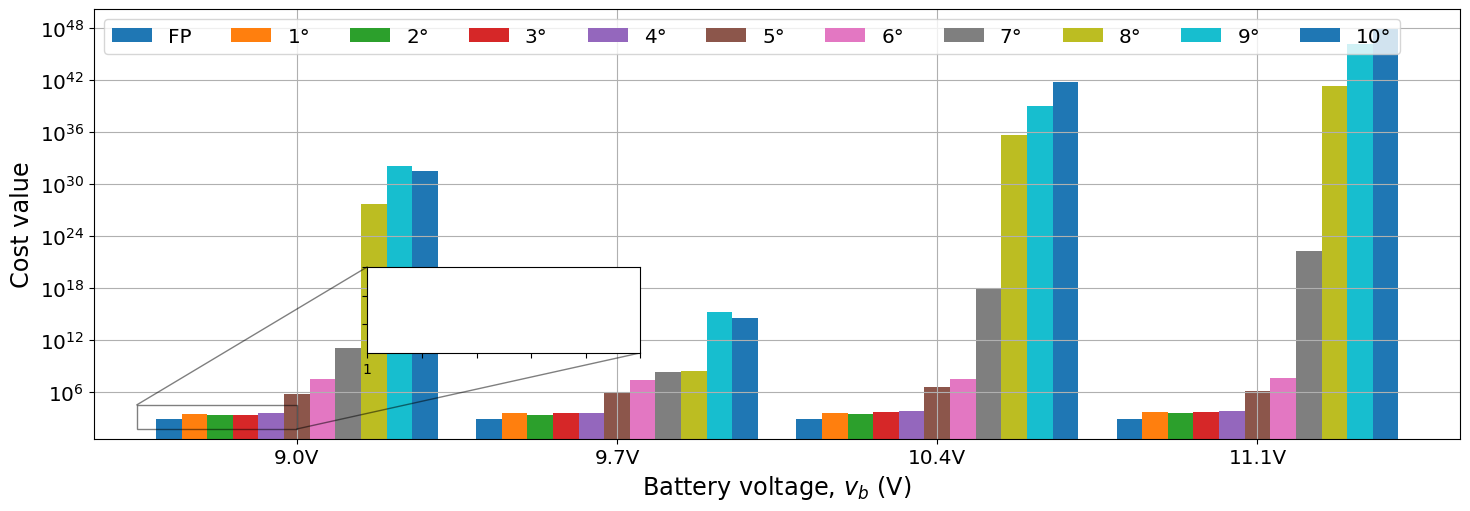

In [39]:
#matplotlib.pyplot.semilogy
species = ("9.0V", "9.7V", "10.4V", "11.1V")
penguin_means = {
    'FP' : (V_ed_090, V_ed_097, V_ed_104, V_ed_111),
    '1°' : (V_1o_090, V_1o_097, V_1o_104, V_1o_111),
    '2°' : (V_2o_090, V_2o_097, V_2o_104, V_2o_111),
    '3°' : (V_3o_090, V_3o_097, V_3o_104, V_3o_111),
    '4°' : (V_4o_090, V_4o_097, V_4o_104, V_4o_111),
    '5°' : (V_5o_090, V_5o_097, V_5o_104, V_5o_111),
    '6°' : (V_6o_090, V_6o_097, V_6o_104, V_6o_111),
    '7°' : (V_7o_090, V_7o_097, V_7o_104, V_7o_111),
    '8°' : (V_8o_090, V_8o_097, V_8o_104, V_8o_111),
    '9°' : (V_9o_090, V_9o_097, V_9o_104, V_9o_111),
    '10°': (V_0o_090, V_0o_097, V_0o_104, V_0o_111)
}

x = np.arange(len(species))  # the label locations
width = 0.08  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=[15,5])
ax.grid(True, which='both', markersize=0.01)

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=200)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cost value', fontsize='xx-large')
ax.set_xlabel('Battery voltage, $v_b$ (V)', fontsize='xx-large')
#ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width*5, species)
ax.legend(loc='upper left', ncol=11, fontsize='x-large')
#ax.set_ylim(0, 20)
ax.set_yscale("log")

ax.tick_params(labelsize='x-large')

# inset axes....
x1, x2, y1, y2 = -0.1, 0.4, 50, 30000  # subregion of the original image
axins = ax.inset_axes(
    [0.2, 0.2, 0.2, 0.2],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[1], yticklabels=[1])

ax.indicate_inset_zoom(axins, edgecolor="black")

plt.show()
fig.savefig(fname='../figures/cost_value.png')

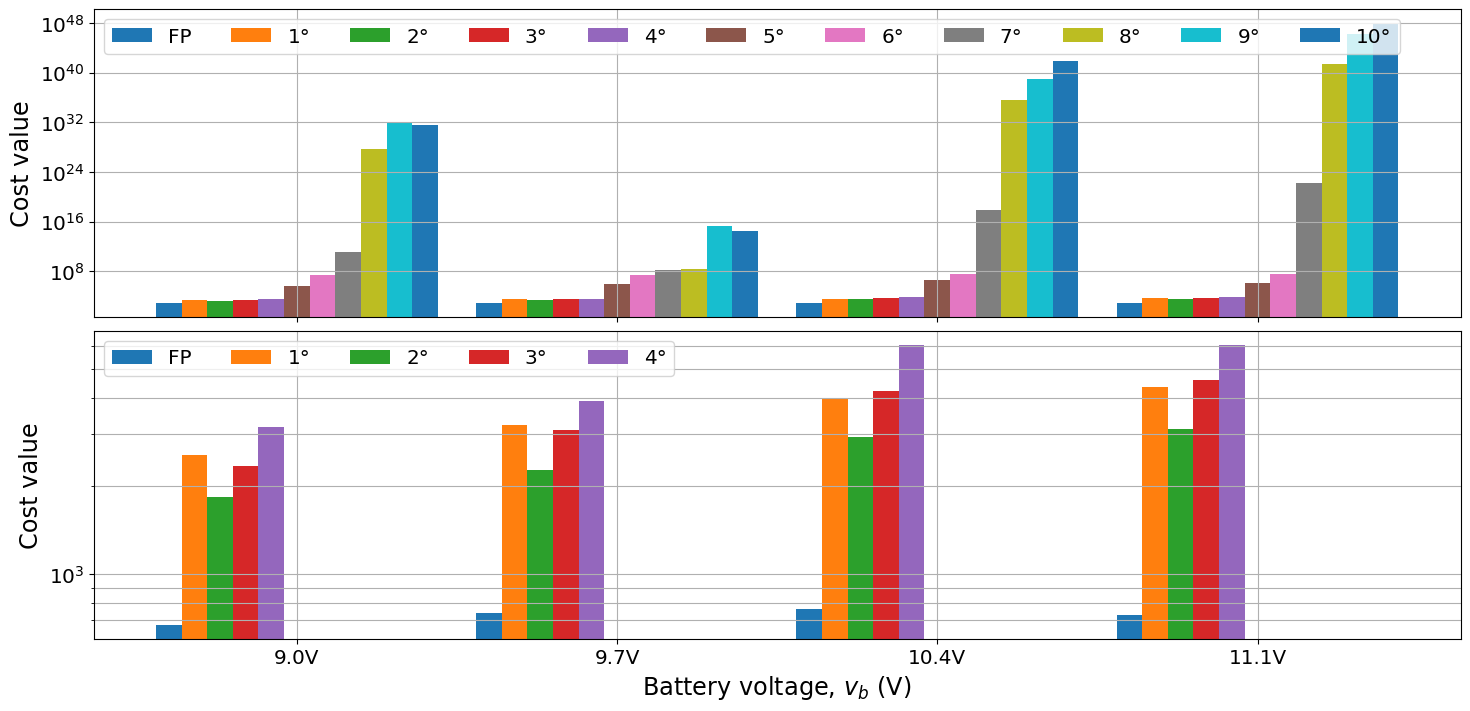

In [62]:
#matplotlib.pyplot.semilogy
species = ("9.0V", "9.7V", "10.4V", "11.1V")
penguin_means = {
    'FP' : (V_ed_090, V_ed_097, V_ed_104, V_ed_111),
    '1°' : (V_1o_090, V_1o_097, V_1o_104, V_1o_111),
    '2°' : (V_2o_090, V_2o_097, V_2o_104, V_2o_111),
    '3°' : (V_3o_090, V_3o_097, V_3o_104, V_3o_111),
    '4°' : (V_4o_090, V_4o_097, V_4o_104, V_4o_111),
    '5°' : (V_5o_090, V_5o_097, V_5o_104, V_5o_111),
    '6°' : (V_6o_090, V_6o_097, V_6o_104, V_6o_111),
    '7°' : (V_7o_090, V_7o_097, V_7o_104, V_7o_111),
    '8°' : (V_8o_090, V_8o_097, V_8o_104, V_8o_111),
    '9°' : (V_9o_090, V_9o_097, V_9o_104, V_9o_111),
    '10°': (V_0o_090, V_0o_097, V_0o_104, V_0o_111)
}

x = np.arange(len(species))  # the label locations
width = 0.08  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(nrows=2, ncols=1, layout='constrained', figsize=[15,7], sharex=True)
ax[0].grid(True, which='both', markersize=0.01)
ax[1].grid(True, which='both', markersize=0.01)

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax[0].bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=200)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('Cost value', fontsize='xx-large')
#ax[0].set_xlabel('Battery voltage, $v_b$ (V)', fontsize='xx-large')
#ax.set_title('Penguin attributes by species')
ax[0].set_xticks(x + width*5, species)
ax[0].legend(loc='upper left', ncol=11, fontsize='x-large')
#ax.set_ylim(0, 20)
ax[0].set_yscale("log")

ax[0].tick_params(labelsize='x-large')

cost = {
    'FP' : (V_ed_090, V_ed_097, V_ed_104, V_ed_111),
    '1°' : (V_1o_090, V_1o_097, V_1o_104, V_1o_111),
    '2°' : (V_2o_090, V_2o_097, V_2o_104, V_2o_111),
    '3°' : (V_3o_090, V_3o_097, V_3o_104, V_3o_111),
    '4°' : (V_4o_090, V_4o_097, V_4o_104, V_4o_111)
}

width = 0.08  # the width of the bars
multiplier = 0
for attribute, measurement in cost.items():
    offset = width * multiplier
    rects = ax[1].bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=200)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set_ylabel('Cost value', fontsize='xx-large')
ax[1].set_xlabel('Battery voltage, $v_b$ (V)', fontsize='xx-large')
#ax[1].set_xticks(x + width*13, species)
ax[1].legend(loc='upper left', ncol=5, fontsize='x-large')
#ax.set_ylim(0, 20)
ax[1].set_yscale("log")

ax[1].tick_params(labelsize='x-large')

plt.show()
fig.savefig(fname='../figures/cost_value.png')